## 实验五 AppleStore应用商城数据分析

> **提示**：<br>
1、这样的文字将会指导你如何使用 jupyter Notebook 来完成项目。<br>
2、你可以通过单击代码区域，然后使用键盘快捷键 Shift+Enter 或 Shift+Return 来运行代码。或者在选择代码后使用执行（run cell）按钮执行代码。Markdown的文字区域也同样可以如此操作。<br>
3、在如下有# TODO 提示的地方，将代码补全，实现注释中所要求的功能。<br>
4、在有"** 回答：**" 提示的地方，回答其上所提出的问题。<br>

### 项目介绍：
* 随着网络的普及，各行各业都呈现蓬勃向上的发展趋势，而智能手机是改变我们生活的重要方式之一，因为智能手机可以允许安装各种app应用，这些应用极大的便利了我们的生活，因此，对app应用程序进行分析变得极为重要。
* 现在我们要对具有代表性的苹果应用商城的app应用进行分析，根据每个app应用的属性进行探索性分析。

### 数据集分析
项目AppleStore数据集包含应用程序ID、名称、大小、价格、评分、内容评级、主要类型、支持设备类型数量等信息，共包括7207行<br>
#### 字段的描述
这个项目我们将对以下字段进行相关性分析。<br>
size_bytes： 大小（以字节为单位） <br>
price： 价格金额 <br>
rating_count_tot： 用户评分计数（适用于所有版本） <br>
rating_count_ver：用户评分计数（当前版本） <br>
user_rating：平均用户评分值（适用于所有版本），取值范围为(0,5]，左开右闭区间 <br>
user_rating_ver：平均用户评分值（对于当前版本）取值范围(0,5]，左开右闭区间 <br>
prime_genre：主要类型 <br>
sup_devices.num：支持设备的数量 <br>
lang.num：支持的语言数量 <br>

### 分析流程：
* 查看数据：导入数据，了解数据集的维度，每列数据的数据类型，以及打印部分数据，进行观察
* 数据清洗：删除除不需要的列，删除重复行数据，删除包含有空值的行数据，以及对异常值进行处理
* 分析数据：<br>
(1)：对用户评分进行分析<br>
(2)：对prime_genre数据分析<br>
(3)：发散题

### 导入必备的库

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 查看数据

In [25]:
filepath = 'AppleStore.csv'
data_all = pd.read_csv(filepath, index_col=0)

In [26]:
# TODO
# 使用info打印数据集每列的信息
print('数据集中每列的信息：\n', data_all.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7206 non-null   float64
 1   track_name        7207 non-null   object 
 2   size_bytes        7195 non-null   float64
 3   currency          7194 non-null   object 
 4   price             7204 non-null   float64
 5   rating_count_tot  7201 non-null   float64
 6   rating_count_ver  7205 non-null   float64
 7   user_rating       7205 non-null   float64
 8   user_rating_ver   7206 non-null   float64
 9   ver               7205 non-null   object 
 10  cont_rating       7202 non-null   object 
 11  prime_genre       7194 non-null   object 
 12  sup_devices.num   7203 non-null   float64
 13  ipadSc_urls.num   7207 non-null   int64  
 14  lang.num          7206 non-null   float64
 15  vpp_lic           7207 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory

问题：(1)数据集的行有多少，列有多少；(2)数据集中的object类型的列数据有几个，(3)每列数据实际长度是否一致

回答：（1）7207行，16列
(2)5个
(3)不一致

In [27]:
# TODO
# 打印数据集的前三行数据
print('前3行数据集为：', data_all.head(3))

前3行数据集为：             id                                       track_name   size_bytes currency  price  rating_count_tot  rating_count_ver  user_rating  user_rating_ver    ver cont_rating   prime_genre  \
1  281656475.0                                  PAC-MAN Premium  100788224.0      USD    NaN           21292.0              26.0          4.0              4.5  6.3.5          4+         Games   
2  281796108.0                        Evernote - stay organized  158578688.0      USD    0.0               NaN              26.0          4.0              3.5  8.2.2          4+  Productivity   
3  281940292.0  WeatherBug - Local Weather, Radar, Maps, Alerts  100524032.0      USD    0.0          188583.0            2822.0          3.5              4.5  5.0.0          4+       Weather   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
1             38.0                5      10.0        1  
2             37.0                5      23.0        1  
3             37.0                5    

### 数据清洗

#### 处理掉不需要分析的列数据

In [28]:
def drop_col(data_all, del_col):
    """
    功能：
        判断data_all数据集中是否存在del_col中的列，若是存在，则删除该列数据
    参数：
        data_all是DataFrame结构的数据集，del_col是一个列表，包含了要删除的列，需要inplace原数据集删除

    """
    # TODO
    # 判断del_col中的列是否在data_all数据集中，若是存在，则删除
    data_all.drop(del_col, axis=1, inplace=True)


del_col = ['id', 'track_name', 'cont_rating', 'currency', 'ver', 'ipadSc_urls.num', 'vpp_lic']
drop_col(data_all, del_col)

In [29]:
# TODO
# 打印data_all的列名和维度
print(data_all.columns)
print(data_all.ndim)

Index(['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'prime_genre', 'sup_devices.num', 'lang.num'], dtype='object')
2


问题：删除掉不需要分析的列以外，我们将要对哪些列进行分析？

回答：

#### 重复行处理
数据集中可能存在重复的行，这些行数据不是我们想要分析的，因此，我们首先需要判断下是否存在重复的行数据，若是存在，则删除该重复行数据

In [30]:
def drop_duplicat_row(data_all):
    """
    功能：
        原数据集删除重复行
    参数：
        data_all是DataFrame的数据集，也是本项目所用的数据集

    """
    # TODO
    # 判断data_all是否存在重复行，若是存在，则打印"存在重复行"，同时，原数据集删除重复行，且保留最后一个重复行
    data_all.duplicated()
    if (not (data_all.duplicated().empty)):
        print("存在重复行")
        data_all.drop_duplicates(keep='last', inplace=True)


print('去除重复行前，数据集的维度是：{}'.format(data_all.shape))
drop_duplicat_row(data_all)
print('去除重复行后，数据集的维度是：{}'.format(data_all.shape))

去除重复行前，数据集的维度是：(7207, 9)
存在重复行
去除重复行后，数据集的维度是：(7195, 9)


问题：是否存在重复行，若存在，去除重复行后，数据集的行变为多少，列变为多少

回答：存在，行7195，列9

#### 缺失值处理
一般的数据集中都存在缺失值，而根据实际情况，对缺失值的处理也不尽相同，这里，我进行简单处理，首先判断包含空值的行有多少个，然后将所有包含缺失值的行数据进行删除

In [31]:
# 【这里其实是想判断每行是否存在缺失值，但由于行很多，这里用列数据中是否包含空值来分析，列中包含空值，行中也是包含空值的，可以达到相同目的】
#查看每列数据中是否包含空值，False即不包含空值，True即包含空值。
data_all.isnull().any()

size_bytes          True
price               True
rating_count_tot    True
rating_count_ver    True
user_rating         True
user_rating_ver     True
prime_genre         True
sup_devices.num     True
lang.num            True
dtype: bool

In [32]:
def drop_nan(data_all):
    """
    功能：
        原数据集删除缺失值
    参数：
        data_all是DataFrame的数据集，也是本项目所用的数据集

    """
    # TODO
    # 计算含有空值的行的个数，若是存在含有空值的行，则本地删除含有空值的行数据
    data_all.dropna(inplace=True)


drop_nan(data_all)

In [33]:
# TODO
#查看每列数据中是否包含空值，False即不包含空值，True即包含空值
data_all.isnull().any()

size_bytes          False
price               False
rating_count_tot    False
rating_count_ver    False
user_rating         False
user_rating_ver     False
prime_genre         False
sup_devices.num     False
lang.num            False
dtype: bool

In [34]:
print('处理完缺失值后，数据集的维度是：{}'.format(data_all.shape))

处理完缺失值后，数据集的维度是：(7151, 9)


问：(1)经过缺失值处理后，数据集中还有多少行数据；(2)经过以上方法验证，数据集中是否还有缺失值存在

答：(1)还有7151行
   (2)没了

#### 异常值处理
对数据经过以上处理后，我们需要对数据集的每列数据的分布有基本的了解，从以下的显示中，我们可以了解到每列数据的长度，均值，标准差，方差，最小值
四分位数，最大值等统计信息

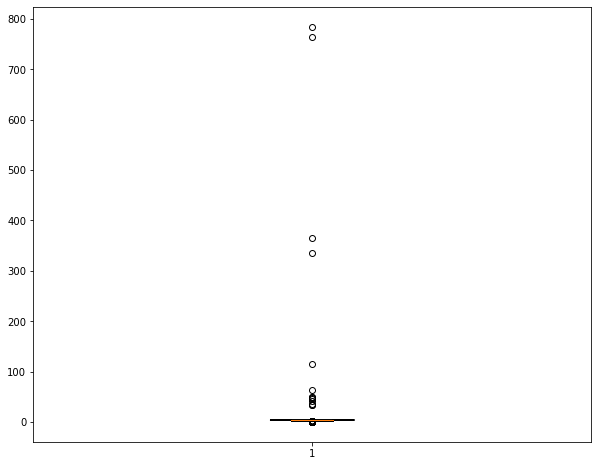

1037


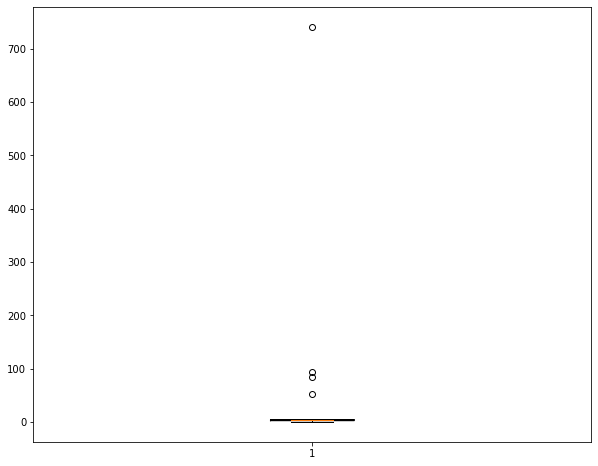

4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7151 entries, 3 to 11087
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   size_bytes        7151 non-null   float64
 1   price             7151 non-null   float64
 2   rating_count_tot  7151 non-null   float64
 3   rating_count_ver  7151 non-null   float64
 4   user_rating       7151 non-null   float64
 5   user_rating_ver   7151 non-null   float64
 6   prime_genre       7151 non-null   object 
 7   sup_devices.num   7151 non-null   float64
 8   lang.num          7151 non-null   float64
dtypes: float64(8), object(1)
memory usage: 558.7+ KB
数据集中每列的信息：
 None


In [35]:
data_all.describe()
plt.figure(figsize=(10, 8))
p = plt.boxplot(data_all['user_rating'].values, notch=True)
outlier1 = p['fliers'][0].get_ydata()
plt.savefig('user_rating异常数据.png')
plt.show()
print(len(outlier1))

plt.figure(figsize=(10, 8))
p = plt.boxplot(data_all['user_rating_ver'].values, notch=True)
outlier1 = p['fliers'][0].get_ydata()
plt.savefig('user_rating_ver异常数据.png')
plt.show()
print(len(outlier1))

print('数据集中每列的信息：\n', data_all.info(verbose=True))

问题：通过观察打印的统计信息，(1)经过以上数据处理后，每列的实际长度是否相同；(2)列名为user_rating和user_rating_ver的列数据中是否存在异常值

回答：
(1)相同
(2)存在

* 经过对description显示的数据分析，列名为user_rating和user_rating_ver的列数据中存在评分为0和评分大于5的评分，而评分的取值范围是(0,5]，因此，我们需要对评分为0和大于5的评分作为异常值进行处理。
* 在此，我们将列名为user_rating和user_rating_ver的列数据中所有大于5和为0的评分进行重新设定。

In [36]:
# TODO
# 将列名为user_rating和user_rating_ver的列数据中所有大于5的数据设定为5。将列数据中评分为0的异常值设定为1.
# 要求在原数据集设定新评分值

ele_lst = ['user_rating', 'user_rating_ver']
data_all.loc[:, ele_lst].describe()
data_all['user_rating'].replace(0, 1, inplace=True)
data_all['user_rating_ver'].replace(0, 1, inplace=True)
data_all.loc[data_all['user_rating'] > 5, 'user_rating'] = 5
data_all.loc[data_all['user_rating_ver'] > 5, 'user_rating_ver'] = 5
data_all.loc[:, ele_lst].describe()

,user_rating,user_rating_ver
count,7151.00000,7151.000000
mean,3.65788,3.454412
std,1.22818,1.459315
min,1.00000,1.000000
25%,3.50000,2.500000
50%,4.00000,4.000000
75%,4.50000,4.500000
max,5.00000,5.000000


### 对用户数据进行分析
rating_count_tot： 用户评分计数（适用于所有版本） <br>
rating_count_ver：用户评分计数（当前版本） <br>
user_rating：平均用户评分值（适用于所有版本），取值范围为(0,5]，左开右闭区间<br> 
user_rating_ver：平均用户评分值（对于当前版本）取值范围(0,5]，左开右闭区间 <br>
* 依据user_rating，对rating_count_ver、rating_count_tot、user_rating_ver、user_rating_ver进行相关性分析，了解这四个列存在的关系

In [37]:
# 了解用户评分列数据中具体包含的非重复星级评分
data_all['user_rating'].unique()

array([3.5, 4. , 4.5, 5. , 3. , 2. , 2.5, 1. , 1.5])

通过以上方法观察用户评分的数据，发现非重复数据相对较多，我们希望将评分分为三个等级来分析，以在不同等级下，对和用户评分有关的列数据进行分析。

In [38]:
def user_rating_group(ele):
    """
    功能：
        对用户评分user_rating的数据进行类别划分
    参数：
        ele是用户评分的每个元素
    返回值：
       返回类别,字符串类型数据 
    """
    # TODO
    # 对用户评分user_rating进行类别划分，要求小于等于2.5的数值设定为'good'，大于等于4.5的设定为'best'，其他的设置为'better'
    if ele <= 2.5:
        type = 'good'
    elif ele >= 4.5:
        type = 'best'
    else:
        type = 'better'

    return type


data_all['user_rating_group'] = data_all['user_rating'].apply(user_rating_group)

对用户评分进行类别划分后，希望依据用户评分类别数据对rating_count_ver、rating_count_tot、user_rating_ver、user_rating_ver进行相关性分析

In [39]:
mean_value = data_all.groupby('user_rating_group')[
    'user_rating_group', 'rating_count_tot', 'rating_count_ver'].mean()
#print(mean_value)


def process(ele):
    """
    功能：
        [依据用户评分类别user_rating_group]，对'rating_count_tot','rating_count_ver'数据中的0值替换为[组内均值]，
        替换之后，对组内的数据进行组内均值计算，且保留两位小数
    参数：
        ele是'rating_count_tot','rating_count_ver'的一组元素(可以打印出来理解一下)
    返回值：
       对 'rating_count_tot','rating_count_ver'进行组内计算均值后，返回这一组均值。
    """
    # TODO
    # 对'rating_count_tot','rating_count_ver'数据中的0值替换为组内均值，替换之后，对组内的数据进行组内均值计算，且保留两位小数
    #print(ele)
    # in [rating_count_tot] find 1st 0.0, check whether 0.0 <-> good/better/best, and then replace 0.0 with the mean value of the corresponding group
    rating_count = ['rating_count_tot', 'rating_count_ver']
    group = ['best', 'better', 'good']
    for some_col in rating_count:
        for classification in group:
            ele.loc[(ele[some_col] == 0.0) & (ele['user_rating_group'] == classification), some_col] = mean_value.at[
                classification, some_col]
    return ele


# rating_count_tot： 用户评分计数（适用于所有版本）
# rating_count_ver：用户评分计数（当前版本）
# user_rating_ver
# user_rating
'''print(data_all.groupby('user_rating_group')[
    'user_rating_group', 'rating_count_tot', 'rating_count_ver'].head())'''
rating_count_data = data_all.groupby('user_rating_group')[
    'user_rating_group', 'rating_count_tot', 'rating_count_ver'].apply(process)
print(rating_count_data.head(100))
user_rating_data = data_all.groupby('user_rating_group')[
    'user_rating_group', 'user_rating', 'user_rating_ver'].mean()
print(user_rating_data.head())

    user_rating_group  rating_count_tot  rating_count_ver
3              better          188583.0            2822.0
4              better          262241.0             649.0
5                best          985920.0            5320.0
6              better            8253.0            5516.0
7              better          119487.0             879.0
..                ...               ...               ...
111              best           16434.0               3.0
112              best           10046.0               7.0
113            better           29107.0              85.0
114            better             878.0              48.0
115            better            1140.0              20.0

[100 rows x 3 columns]
                   user_rating  user_rating_ver
user_rating_group                              
best                  4.579517         4.286260
better                3.729236         3.531657
good                  1.321104         1.319213


<ipython-input-39-dbce16726a8f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_value = data_all.groupby('user_rating_group')[
<ipython-input-39-dbce16726a8f>:60: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_count_data = data_all.groupby('user_rating_group')[
<ipython-input-39-dbce16726a8f>:63: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_rating_data = data_all.groupby('user_rating_group')[


                   rating_count_tot  rating_count_ver
user_rating_group                                    
best                   6.259915e+07      2.771105e+06
better                 2.565577e+07      7.348880e+05
good                   2.347715e+06      3.217216e+04


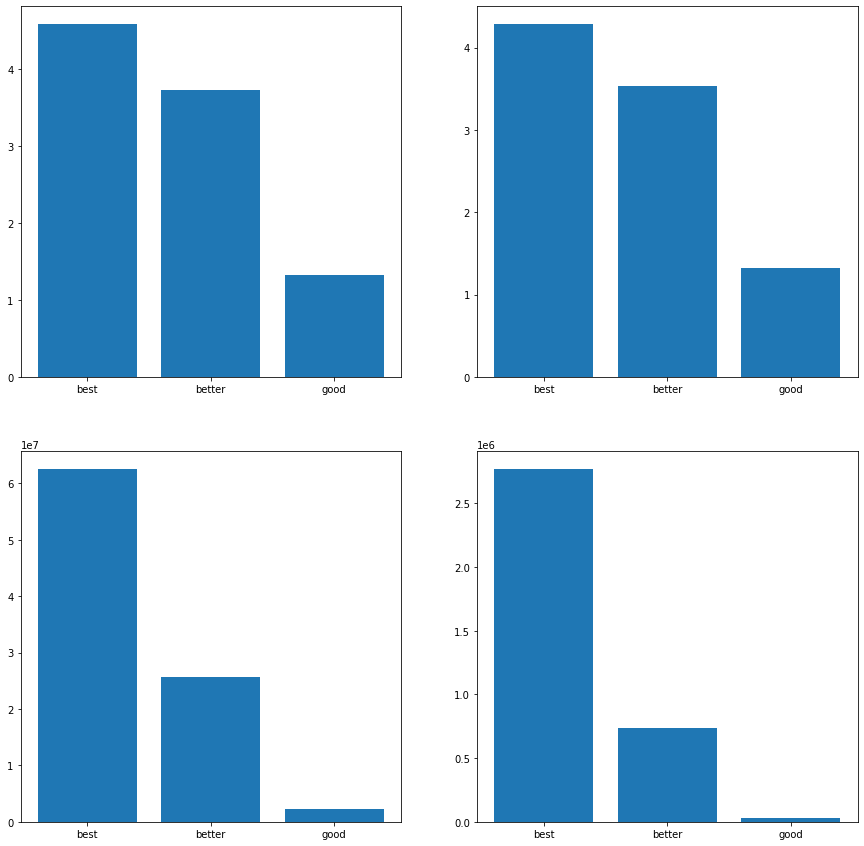

In [40]:
# TODO
# 绘图
# 依据计算出来的rating_count_data和user_rating_data数据，通过绘制[2行2列]的图显示[user_rating_group对应类别，各数据的走势]。
# 由于横轴均是user_rating_group，因此，使用subplots设置参数共享x轴
x_label = ['best', 'better', 'good']
y1_values = user_rating_data.user_rating
y2_values = user_rating_data.user_rating_ver
new_rating_count_data = rating_count_data.groupby(by='user_rating_group').agg(np.sum)
y3_values = new_rating_count_data.rating_count_tot
y4_values = new_rating_count_data.rating_count_ver
p = plt.figure(figsize=(15, 15))

ax1 = p.add_subplot(2, 2, 1)
figure1 = plt.bar(x=range(len(x_label)), height=y1_values, tick_label=x_label)

ax2 = p.add_subplot(2, 2, 2)
figure2 = plt.bar(x=range(len(x_label)), height=y2_values, tick_label=x_label)

print(new_rating_count_data)
ax3 = p.add_subplot(2, 2, 3)
figure3 = plt.bar(x=range(len(x_label)), height=y3_values, tick_label=x_label)

ax4 = p.add_subplot(2, 2, 4)
figure4 = plt.bar(x=range(len(x_label)), height=y4_values, tick_label=x_label)

plt.show()

问题：总以上四个小图中，可以得出什么结论

回答：越好的应用评分越多？

### 对prime_genre数据分析

* prime_genre表明了这个app应用所属类型，比如健康类性、旅游类型、咨询类型、游戏类型、音乐类型等等，并且有的app应用会同属于几个类型。这时，我们需要对数据进行处理，以进行下一步分析。
* 当app应用同属于几个类型时，我们仅保留一个作为这个app应用所属类型。

In [41]:
# 对prime_genre数据进行类别查看，观察是否存在一个app应用同属于多个类别的情况。
data_all['prime_genre'].unique()

array(['Weather', 'Shopping', 'Reference', 'Games', 'Finance', 'Music',
       'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
       'Health & Fitness', 'Productivity', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

问题：从打印的结果中，我们发现一个app应用可能同属于多个类型吗，多个类型以什么符号进行连接

回答：可能，用&

In [42]:
# TODO
# 当app应用所属类型大于2个时，在所属类型prime_genre中，则多个类型之间以&进行类型连接
# 现在我们仅需要保留多个类型中的第一个类型，将该类型作为该app所属类型
# 最后将处理后的数据，以新的列数据保存在原数据集data_all中，列名为prime_genre_class，且将prime_genre列数据从原数据集中删除
data_all['prime_genre'].replace('Health & Fitness', 'Health', inplace=True)
data_all['prime_genre'].replace('Photo & Video', 'Photo', inplace=True)
data_all['prime_genre'].replace('Food & Drink', 'Food', inplace=True)
data_all.rename(columns={'prime_genre': 'prime_genre_class'}, inplace=True)

In [43]:
# TODO
# 对新生成的prime_genre_class数据进行类别查看，观察是否还存在包含&的类型。
data_all['prime_genre_class'].unique()

array(['Weather', 'Shopping', 'Reference', 'Games', 'Finance', 'Music',
       'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
       'Health', 'Productivity', 'Entertainment', 'Photo', 'Navigation',
       'Education', 'Lifestyle', 'Food', 'News', 'Book', 'Medical',
       'Catalogs'], dtype=object)

* 现在我们只关心用户评分较高的一些app应用的列，需要按照prime_genre_class的数据进行分类，通过计算每类app应用size_bytes的均值，了解app应用属于哪种类型时，这类app应用占用的内存较高，且支持设备的个数如何。

In [44]:
# 得到用户评级分较高的数据
dataset = data_all[(data_all['user_rating_group'] == 'best')]
dataset.shape

(3144, 10)

In [45]:
# TODO
# 使用透视表对size_bytes数据计算均值，其中行索引设置为prime_genre_class数据，列索引设置为sup_devices.num数据
site_bytes_data = pd.pivot_table(data=data_all[['size_bytes', 'prime_genre_class', 'sup_devices.num']],
                                 index='prime_genre_class', columns='sup_devices.num')
site_bytes_data.shape
print(site_bytes_data.columns)
print("********************************************我是一条分割线********************************************")
print(site_bytes_data.dtypes)
print("********************************************我是一条分割线********************************************")
print(site_bytes_data.info(verbose=True))
print("********************************************我是一条分割线********************************************")
print(site_bytes_data.values)
print("********************************************我是一条分割线********************************************")
print(site_bytes_data.mean(1).head())
print("********************************************我是一条分割线********************************************")

pd.set_option('display.max_columns', 21)
pd.set_option('display.width', 2100)
print(site_bytes_data.head())

MultiIndex([('size_bytes',  9.0),
            ('size_bytes', 11.0),
            ('size_bytes', 12.0),
            ('size_bytes', 13.0),
            ('size_bytes', 15.0),
            ('size_bytes', 16.0),
            ('size_bytes', 23.0),
            ('size_bytes', 24.0),
            ('size_bytes', 25.0),
            ('size_bytes', 26.0),
            ('size_bytes', 33.0),
            ('size_bytes', 35.0),
            ('size_bytes', 36.0),
            ('size_bytes', 37.0),
            ('size_bytes', 38.0),
            ('size_bytes', 39.0),
            ('size_bytes', 40.0),
            ('size_bytes', 43.0),
            ('size_bytes', 45.0),
            ('size_bytes', 47.0)],
           names=[None, 'sup_devices.num'])
********************************************我是一条分割线********************************************
            sup_devices.num
size_bytes  9.0                float64
            11.0               float64
            12.0               float64
            13.0               flo

问题：关于所属类型prime_genre_class和支持设备的数量sup_devices.num对app应用占内存情况进行分析，可以作图进行分析，它们之间的关系是？

回答：在不同用户评分类别中，app应用的占内存大小和支持设备数量存在某种关系

### 发散题

* 题目要求：<br>
在以上分析中，我们通过观察分析，了解到，在不同用户评分类别中，app应用的占内存大小和支持语言数量是存在某种关系的，现在我们需要对不同类别的占内存大小和支持语言数量的关系进行进一步分析，必要的话可以进行相应的数据处理，并且可以选择任意合适的图来分析这种关系。


<class 'list'>
<class 'list'>


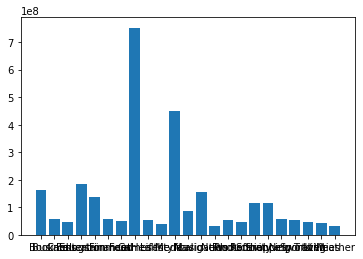

            sup_devices.num
size_bytes  9.0                1.476198e+07
            11.0               6.094694e+07
            12.0               1.350441e+08
            13.0               2.916791e+07
            15.0               8.735386e+07
            16.0               6.167092e+08
            23.0               6.327194e+07
            24.0               1.745805e+08
            25.0               2.673343e+08
            26.0               5.860393e+07
            33.0               2.170086e+09
            35.0               2.465973e+08
            36.0               5.026668e+08
            37.0               1.190621e+08
            38.0               8.995380e+07
            39.0               2.576295e+08
            40.0               7.084278e+07
            43.0               5.339044e+07
            45.0               8.801929e+07
            47.0               1.509665e+07
dtype: float64
[('size_bytes', 9.0), ('size_bytes', 11.0), ('size_bytes', 12.0), ('size_byte

In [46]:
#逐类体积
vertical_site_bytes_data = site_bytes_data.mean(1)
#print(vertical_site_bytes_data)
#print(type(vertical_site_bytes_data))
pd.set_option('display.width', 210)
print(type(vertical_site_bytes_data.index.tolist()))
print(type(vertical_site_bytes_data.values.tolist()))

x_label = vertical_site_bytes_data.index.tolist()
y_values = vertical_site_bytes_data.values.tolist()
p = plt.figure()
figure1 = plt.bar(x=range(len(x_label)), height=y_values, tick_label=x_label)
plt.show()

#逐类支援设备数
horizontal_site_bytes_data = site_bytes_data.mean()
#print(horizontal_site_bytes_data)
print(horizontal_site_bytes_data)
print(horizontal_site_bytes_data.index.tolist())
print(horizontal_site_bytes_data.values.tolist())
